In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
train = pd.read_csv("./data.csv")

In [3]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,509,147,621,254
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,444,146,514,258
2,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,345,219,457,328
3,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,287,340,407,445
4,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,1,154,86,245


In [4]:
train['xmin'],train['xmax'] = train['xmin'] / 640,train['xmax'] / 640
train['ymin'],train['ymax'] = train['ymin'] / 480,train['ymax'] / 480

In [5]:
train.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.795312,0.306250,0.970313,0.529167
1,./JPEGImages/BloodImage_00266.jpg,640,480,RBC,0.693750,0.304167,0.803125,0.537500


In [6]:
data = []
grouped = train.groupby(by='filename')

for i in train.filename.unique():
    boxes = list(grouped.get_group(i)[['class','xmin','ymin','xmax','ymax']].T.to_dict().values())
    data.append({
        'filename':i,
        'boxes':boxes
    })

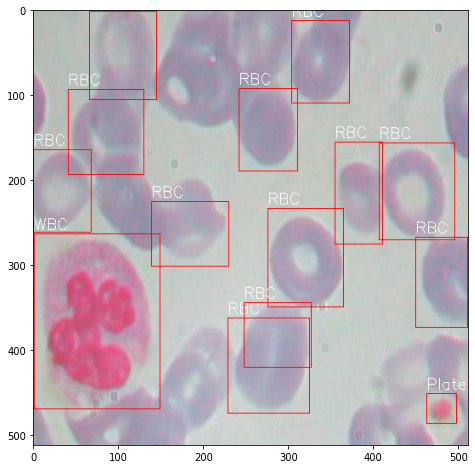

In [8]:
image = data[0]

img = cv2.imread(image['filename'])
img = cv2.resize(img,(512,512))

for box in image['boxes']:
    img = cv2.putText(img,box['class'],(int(box['xmin']*512),int(box['ymin']*512)-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255))
    img = cv2.rectangle(
            img,
            (int(box['xmin']*512),int(box['ymin']*512)),
            (int(box['xmax']*512),int(box['ymax']*512)),
            (255,0,0),
            1
        )

plt.figure(figsize=(12,8))
plt.imshow(img)

In [9]:
images = np.array([cv2.imread(i['filename']) for i in data])

In [16]:
import tensorflow as tf
import tensorflow.keras as keras 
import tensorflow.keras.layers as layers



In [17]:
tf.enable_eager_execution()

In [19]:
vgg16 = keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(512,512,3))

In [20]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [25]:
images = tf.image.resize_bilinear(images,(512,512)).numpy().astype(np.float32)